<a href="https://colab.research.google.com/github/kingloki-github/fuzzy-adventure/blob/main/fakenews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_raw=pd.read_csv('/content/drive/MyDrive/datasets/fake news comp train.csv')

In [3]:
df_raw.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [4]:
df_raw.label.value_counts(normalize=True)

1    0.500625
0    0.499375
Name: label, dtype: float64

In [5]:
%%time
df_raw.author.nunique()

CPU times: user 2.04 ms, sys: 8 µs, total: 2.05 ms
Wall time: 1.94 ms


4201

In [6]:
df_raw.dropna(how='any',axis=0,inplace=True)

In [7]:
df_raw.shape

(18285, 5)

In [8]:
df_raw.label.value_counts(normalize=True)

0    0.566639
1    0.433361
Name: label, dtype: float64

In [9]:
df_raw.reset_index(inplace=True)

In [10]:
df_raw.drop(columns=['index','id','author'],inplace=True)

In [11]:
df_raw['news']=df_raw['title']+df_raw['text']

In [12]:
df_raw.text[0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing emai

In [13]:
df=df_raw[['label','news']]
df

,label,news
0,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,1,Why the Truth Might Get You FiredWhy the Truth...
3,1,15 Civilians Killed In Single US Airstrike Hav...
4,1,Iranian woman jailed for fictional unpublished...
...,...,...
18280,0,Rapper T.I.: Trump a ’Poster Child For White S...
18281,0,"N.F.L. Playoffs: Schedule, Matchups and Odds -..."
18282,0,Macy’s Is Said to Receive Takeover Approach by...
18283,1,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [14]:
df.label.value_counts(normalize=True)

0    0.566639
1    0.433361
Name: label, dtype: float64

In [15]:
df.news[0:5]

0    House Dem Aide: We Didn’t Even See Comey’s Let...
1    FLYNN: Hillary Clinton, Big Woman on Campus - ...
2    Why the Truth Might Get You FiredWhy the Truth...
3    15 Civilians Killed In Single US Airstrike Hav...
4    Iranian woman jailed for fictional unpublished...
Name: news, dtype: object

In [16]:
import nltk
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
%%time
corpus=[]
ps=PorterStemmer()
for i in range(0, len(df.news)):

    review = re.sub('[^a-zA-Z]', ' ', df['news'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english') if word not in string.punctuation]
    review = ' '.join(review)
    corpus.append(review)
    

In [18]:
corpus[0:2]

['hous dem aid even see comey letter jason chaffetz tweet ithous dem aid even see comey letter jason chaffetz tweet darrel lucu octob subscrib jason chaffetz stump american fork utah imag courtesi michael jolley avail creativ common licens apolog keith olbermann doubt worst person world week fbi director jame comey accord hous democrat aid look like also know second worst person well turn comey sent infam letter announc fbi look email may relat hillari clinton email server rank democrat relev committe hear comey found via tweet one republican committe chairmen know comey notifi republican chairmen democrat rank member hous intellig judiciari oversight committe agenc review email recent discov order see contain classifi inform long letter went oversight committe chairman jason chaffetz set polit world ablaz tweet fbi dir inform fbi learn exist email appear pertin investig case reopen jason chaffetz jasoninthehous octob cours know case comey actual say review email light unrel case know 

In [19]:
import tensorflow
tensorflow.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [20]:
from tensorflow.keras.preprocessing.sequence import  pad_sequences
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer

In [21]:
vocsize=30000
#onehot_repr=[one_hot(word,vocsize)for word in corpus]

In [22]:
t=Tokenizer(oov_token='<oov>',num_words=30000)

In [23]:
t.fit_on_texts(corpus)

In [24]:
word_index=t.word_index

In [128]:
word_index

{'<oov>': 1,
 'said': 2,
 'mr': 3,
 'trump': 4,
 'one': 5,
 'state': 6,
 'would': 7,
 'new': 8,
 'peopl': 9,
 'year': 10,
 'like': 11,
 'time': 12,
 'presid': 13,
 'clinton': 14,
 'also': 15,
 'american': 16,
 'say': 17,
 'go': 18,
 'even': 19,
 'use': 20,
 'make': 21,
 'report': 22,
 'work': 23,
 'could': 24,
 'mani': 25,
 'us': 26,
 'nation': 27,
 'govern': 28,
 'get': 29,
 'day': 30,
 'call': 31,
 'elect': 32,
 'two': 33,
 'first': 34,
 'countri': 35,
 'unit': 36,
 'want': 37,
 'world': 38,
 'last': 39,
 'take': 40,
 'obama': 41,
 'york': 42,
 'news': 43,
 'polit': 44,
 'right': 45,
 'hillari': 46,
 'includ': 47,
 'way': 48,
 'support': 49,
 'campaign': 50,
 'hous': 51,
 'come': 52,
 'think': 53,
 'know': 54,
 'back': 55,
 'offic': 56,
 'may': 57,
 'vote': 58,
 'show': 59,
 'ms': 60,
 'offici': 61,
 'democrat': 62,
 'white': 63,
 'republican': 64,
 'u': 65,
 'see': 66,
 'need': 67,
 'group': 68,
 'war': 69,
 'made': 70,
 'live': 71,
 'law': 72,
 'much': 73,
 'look': 74,
 'media': 75

In [26]:
len(word_index)

112126

In [28]:
sentences=t.texts_to_sequences(corpus)

In [123]:
sentences[0]

[51,
 2870,
 479,
 19,
 66,
 484,
 635,
 2417,
 5085,
 975,
 1,
 2870,
 479,
 19,
 66,
 484,
 635,
 2417,
 5085,
 975,
 8455,
 16158,
 395,
 2051,
 2417,
 5085,
 6003,
 16,
 7451,
 3130,
 665,
 3520,
 707,
 1,
 892,
 1975,
 730,
 1773,
 1637,
 4227,
 22311,
 1092,
 1429,
 130,
 38,
 85,
 264,
 254,
 751,
 484,
 92,
 51,
 62,
 479,
 74,
 11,
 15,
 54,
 342,
 1429,
 130,
 76,
 147,
 484,
 646,
 3957,
 635,
 336,
 264,
 74,
 101,
 57,
 405,
 46,
 14,
 101,
 1259,
 1561,
 62,
 2432,
 413,
 483,
 484,
 128,
 1145,
 975,
 5,
 64,
 413,
 8999,
 54,
 484,
 3624,
 64,
 8999,
 62,
 1561,
 126,
 51,
 417,
 3159,
 3330,
 413,
 308,
 615,
 101,
 117,
 1070,
 139,
 66,
 1014,
 1484,
 163,
 121,
 635,
 375,
 3330,
 413,
 860,
 2417,
 5085,
 208,
 44,
 38,
 13633,
 975,
 264,
 12713,
 163,
 264,
 481,
 630,
 101,
 158,
 5640,
 102,
 95,
 2247,
 2417,
 5085,
 21376,
 395,
 387,
 54,
 95,
 484,
 311,
 17,
 615,
 101,
 651,
 4487,
 95,
 54,
 1862,
 1478,
 5378,
 1908,
 1022,
 233,
 84,
 195,
 322,
 5085,

In [30]:
len(sentences)

18285

In [52]:
sent_length=3000
embedded_docs=pad_sequences(sentences,padding='pre',truncating='pre',maxlen=sent_length)

In [53]:
embedded_docs

array([[    0,     0,     0, ..., 12138, 21377,   642],
       [    0,     0,     0, ...,  1424,   645,  6590],
       [    0,     0,     0, ...,   260,  1655,  4958],
       ...,
       [    0,     0,     0, ...,  3390,  2504,   771],
       [    0,     0,     0, ...,  1902,   954,  2858],
       [    0,     0,     0, ..., 15553,  2015,  1084]], dtype=int32)

In [54]:
len(embedded_docs[0])

3000

In [35]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,embeddings
from keras.optimizers import Adam
from keras.metrics import binary_crossentropy

In [36]:
vocsize=30000

In [56]:
embedding_feature_dim=100
model=Sequential()
model.add(Embedding(vocsize,embedding_feature_dim,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
print(model.summary())


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 3000, 100)         3000000   
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 3,080,501
Trainable params: 3,080,501
Non-trainable params: 0
_________________________________________________________________
None


In [57]:
len(embedded_docs[5]),df['label'].shape


(3000, (18285,))

In [58]:
import numpy as np
x_final=np.array(embedded_docs)
y_final=np.array(df['label'])

In [59]:
x_final.shape,y_final.shape

((18285, 3000), (18285,))

In [60]:
randomseed=10000
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_final,y_final,random_state=randomseed,train_size=0.7)

In [61]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((12799, 3000), (12799,), (5486, 3000), (5486,))

In [62]:
### Finally Training
model.fit(x_train,y_train,epochs=10,batch_size=64,verbose=1)

Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


In [63]:
y_pred=model.predict_classes(x_test)
y_pred

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0],
       [0],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int32)

In [64]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [65]:
accuracy_score(y_true=y_test,y_pred=y_pred)

0.9238060517681371

In [66]:
a=confusion_matrix(y_test,y_pred)

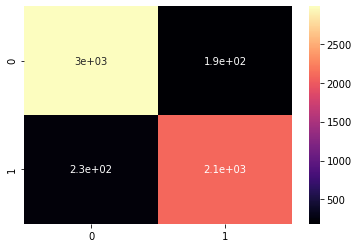

In [120]:
import seaborn as sns
sns.heatmap(a,annot=True,cmap='magma')

In [68]:
df_test=pd.read_csv('/content/drive/MyDrive/datasets/fake news comp test.csv')

In [69]:
df_test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [70]:
df_test.tail()

,id,title,author,text
5195,25995,The Bangladeshi Traffic Jam That Never Ends - ...,Jody Rosen,Of all the dysfunctions that plague the world’...
5196,25996,John Kasich Signs One Abortion Bill in Ohio bu...,Sheryl Gay Stolberg,WASHINGTON — Gov. John Kasich of Ohio on Tu...
5197,25997,"California Today: What, Exactly, Is in Your Su...",Mike McPhate,Good morning. (Want to get California Today by...
5198,25998,300 US Marines To Be Deployed To Russian Borde...,NaN,« Previous - Next » 300 US Marines To Be Deplo...
5199,25999,"Awkward Sex, Onscreen and Off - The New York T...",Teddy Wayne,Perhaps you’ve seen the new TV series whose pi...


In [71]:
df_test.shape

(5200, 4)

In [72]:
df_test.isna().sum()

id          0
title     122
author    503
text        7
dtype: int64

In [73]:
df_test['news']=df_test['title']+df_test['text']
df_test.drop(columns=['author'],inplace=True)
df_test

,id,title,text,news
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...","PALO ALTO, Calif. — After years of scorning...","Specter of Trump Loosens Tongues, if Not Purse..."
1,20801,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Videos #NoDAPL: Native American Leaders Vow to...,#NoDAPL: Native American Leaders Vow to Stay A...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...","If at first you don’t succeed, try a different...","Tim Tebow Will Attempt Another Comeback, This ..."
4,20804,Keiser Report: Meme Wars (E995),42 mins ago 1 Views 0 Comments 0 Likes 'For th...,Keiser Report: Meme Wars (E995)42 mins ago 1 V...
...,...,...,...,...
5195,25995,The Bangladeshi Traffic Jam That Never Ends - ...,Of all the dysfunctions that plague the world’...,The Bangladeshi Traffic Jam That Never Ends - ...
5196,25996,John Kasich Signs One Abortion Bill in Ohio bu...,WASHINGTON — Gov. John Kasich of Ohio on Tu...,John Kasich Signs One Abortion Bill in Ohio bu...
5197,25997,"California Today: What, Exactly, Is in Your Su...",Good morning. (Want to get California Today by...,"California Today: What, Exactly, Is in Your Su..."
5198,25998,300 US Marines To Be Deployed To Russian Borde...,« Previous - Next » 300 US Marines To Be Deplo...,300 US Marines To Be Deployed To Russian Borde...


In [74]:
df_test.news.isna().sum()

129

In [75]:
df_test.loc[df_test.news=='NaN'].index

Int64Index([], dtype='int64')

In [76]:
pd.set_option('display.max_colwidth',None)

In [77]:
filt=df_test['news'].isnull()
filt

0       False
1       False
2       False
3       False
4       False
        ...  
5195    False
5196    False
5197    False
5198    False
5199    False
Name: news, Length: 5200, dtype: bool

In [78]:
df_test[filt].index

Int64Index([   9,   22,   42,   45,   48,  125,  168,  201,  204,  249,
            ...
            4710, 4736, 4839, 4845, 4924, 4955, 4961, 4963, 5066, 5092],
           dtype='int64', length=129)

In [79]:
df_test.news[9]

nan

In [80]:
df_test.news[4963]

nan

In [81]:
df_test.drop(columns=['title','text'],inplace=True)

here i am wondering how to handle missing values

1.   maybe a symbol imputation is good
     i think
2.   later if i use one_hot encoding will there be any use if i do one hot encoding seperately for train and testing data





In [82]:
pd.set_option('display.max_colwidth',100)

In [83]:
df_test

,id,news
0,20800,"Specter of Trump Loosens Tongues, if Not Purse Strings, in Silicon Valley - The New York TimesPA..."
1,20801,Russian warships ready to strike terrorists near AleppoRussian warships ready to strike terroris...
2,20802,"#NoDAPL: Native American Leaders Vow to Stay All Winter, File Lawsuit Against PoliceVideos #NoDA..."
3,20803,"Tim Tebow Will Attempt Another Comeback, This Time in Baseball - The New York TimesIf at first y..."
4,20804,Keiser Report: Meme Wars (E995)42 mins ago 1 Views 0 Comments 0 Likes 'For the first time in his...
...,...,...
5195,25995,The Bangladeshi Traffic Jam That Never Ends - The New York TimesOf all the dysfunctions that pla...
5196,25996,John Kasich Signs One Abortion Bill in Ohio but Vetoes a More Restrictive Measure - The New York...
5197,25997,"California Today: What, Exactly, Is in Your Sushi? - The New York TimesGood morning. (Want to ge..."
5198,25998,300 US Marines To Be Deployed To Russian Border In Norway« Previous - Next » 300 US Marines To B...


In [84]:
df_test.news.fillna(value='no news here',inplace=True)
df_test.isna().sum()

id      0
news    0
dtype: int64

## preprocessing test data

In [ ]:
%%time
corpus1=[]
ps=PorterStemmer()
for i in range(0, len(df_test.news)):
   
    review = re.sub('[^a-zA-Z]', ' ', df_test['news'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english') if word not in string.punctuation]
    review = ' '.join(review)
    corpus1.append(review)

In [87]:
test_sentences=t.texts_to_sequences(corpus1)

In [89]:
test_embedded_docs=pad_sequences(test_sentences,padding='pre',truncating='pre',maxlen=sent_length)

In [90]:
test_embedded_docs[0:4]

array([[   0,    0,    0, ...,  162, 1779,  169],
       [   0,    0,    0, ..., 5957,  501,  256],
       [   0,    0,    0, ..., 3984, 1201,  395],
       [   0,    0,    0, ..., 1483, 2416, 4866]], dtype=int32)

In [91]:
len(test_sentences)

5200

In [92]:
X_TEST=np.array(test_embedded_docs)
X_TEST

array([[   0,    0,    0, ...,  162, 1779,  169],
       [   0,    0,    0, ..., 5957,  501,  256],
       [   0,    0,    0, ..., 3984, 1201,  395],
       ...,
       [   0,    0,    0, ...,   65,  295, 2236],
       [   0,    0,    0, ..., 1101,  405,  305],
       [   0,    0,    0, ..., 6253,  799, 2000]], dtype=int32)

In [94]:
len(X_TEST[0])

3000

In [96]:
y_test_pred=model.predict_classes(X_TEST)
y_test_pred

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0],
       [1],
       [1],
       ...,
       [0],
       [1],
       [0]], dtype=int32)

In [99]:
y_test_pred.shape

(5200, 1)

In [110]:
y_test_pred.ravel()

array([0, 1, 1, ..., 0, 1, 0], dtype=int32)

In [116]:
y_test_pred.reshape((5200,))

array([0, 1, 1, ..., 0, 1, 0], dtype=int32)

In [112]:
output=pd.DataFrame({'id':df_test.id,'label':y_test_pred.ravel()})

In [113]:
output

,id,label
0,20800,0
1,20801,1
2,20802,1
3,20803,0
4,20804,1
...,...,...
5195,25995,1
5196,25996,0
5197,25997,0
5198,25998,1


In [115]:
output.to_csv('submission.csv', index=False)